
#**Suryakanta Karan (M22AIE207) m22aie207@iitj.ac.in**

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/surya/DL_Ops/Assignment_2')

Mounted at /content/drive


In [17]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt


In [18]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transforms for data augmentation
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

In [19]:
# Choose the dataset based on the roll number
roll_no = 207  # Replace with your roll number
mod_value = roll_no % 3
if mod_value == 0:
    dataset_name = "STL10"
    trainset = datasets.STL10(root='./data', split='train', download=True, transform=transform_train)
    testset = datasets.STL10(root='./data', split='test', download=True, transform=transform_test)
elif mod_value == 1:
    dataset_name = "SVHN"
    trainset = datasets.SVHN(root='./data', split='train', download=True, transform=transform_train)
    testset = datasets.SVHN(root='./data', split='test', download=True, transform=transform_test)
else:
    dataset_name = "FashionMNIST"
    trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform_train)
    testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [24]:
# Subsample the datasets for faster execution
trainset = Subset(trainset, range(1000))  # Using 1000 samples for training
testset = Subset(testset, range(1000))      # Using 1000 samples for testing

# Define the data loaders
trainloader = DataLoader(trainset, batch_size=16, shuffle=True)
testloader = DataLoader(testset, batch_size=16, shuffle=False)

# Load the pre-trained ResNet101 model
model = torchvision.models.resnet101(pretrained=True)
for param in model.parameters():
    param.requires_grad = False  # Freeze convolutional layers

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # 10 classes for our datasets
model = model.to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

In [25]:
# Define the optimizers
optimizers = {
    "Adam": optim.Adam(model.fc.parameters(), lr=0.001),
    "Adagrad": optim.Adagrad(model.fc.parameters(), lr=0.01),
    "Adadelta": optim.Adadelta(model.fc.parameters(), lr=1.0),
    "RMSprop": optim.RMSprop(model.fc.parameters(), lr=0.001)
}

In [26]:
# Training function
def train(optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    train_loss = running_loss / len(trainloader)
    train_acc = 100. * correct / total
    return train_loss, train_acc

# Testing function
def test():
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    test_loss /= len(testloader)
    test_acc = 100. * correct / total
    return test_loss, test_acc

Training with Adam
Epoch 1/10: Train Loss: 1.4182 | Train Acc: 56.30% | Test Loss: 0.4867 | Test Acc: 89.70%
Epoch 2/10: Train Loss: 0.7244 | Train Acc: 80.10% | Test Loss: 0.3580 | Test Acc: 91.10%
Epoch 3/10: Train Loss: 0.5870 | Train Acc: 82.40% | Test Loss: 0.2456 | Test Acc: 94.30%
Epoch 4/10: Train Loss: 0.4682 | Train Acc: 85.20% | Test Loss: 0.2447 | Test Acc: 93.20%
Epoch 5/10: Train Loss: 0.4945 | Train Acc: 84.70% | Test Loss: 0.2480 | Test Acc: 92.70%
Epoch 6/10: Train Loss: 0.4711 | Train Acc: 85.30% | Test Loss: 0.1923 | Test Acc: 95.00%
Epoch 7/10: Train Loss: 0.4666 | Train Acc: 85.10% | Test Loss: 0.1783 | Test Acc: 95.10%
Epoch 8/10: Train Loss: 0.4560 | Train Acc: 85.00% | Test Loss: 0.1922 | Test Acc: 93.30%
Epoch 9/10: Train Loss: 0.3960 | Train Acc: 87.00% | Test Loss: 0.2233 | Test Acc: 93.80%
Epoch 10/10: Train Loss: 0.4813 | Train Acc: 83.80% | Test Loss: 0.1921 | Test Acc: 93.90%


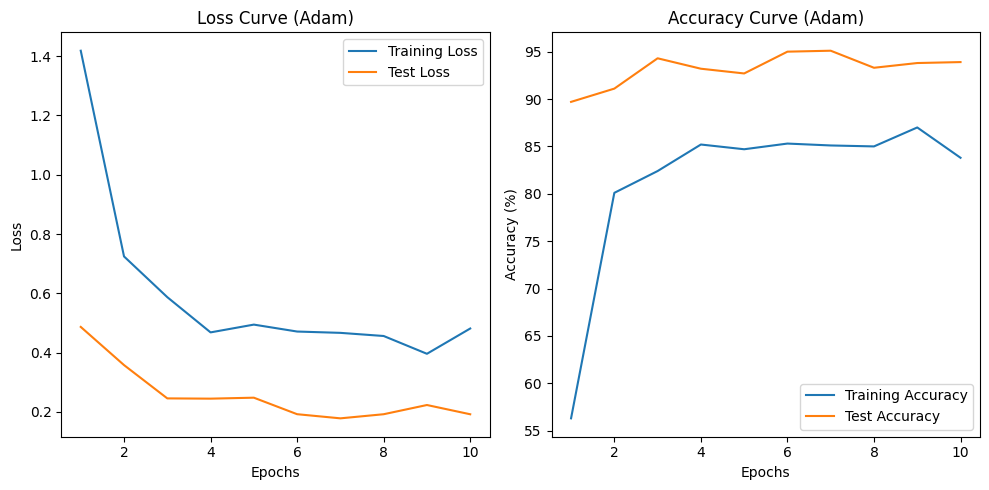

Training with Adagrad
Epoch 1/10: Train Loss: 0.7351 | Train Acc: 80.60% | Test Loss: 0.1732 | Test Acc: 94.60%
Epoch 2/10: Train Loss: 0.3999 | Train Acc: 87.00% | Test Loss: 0.1761 | Test Acc: 94.20%
Epoch 3/10: Train Loss: 0.3908 | Train Acc: 87.20% | Test Loss: 0.1763 | Test Acc: 94.70%
Epoch 4/10: Train Loss: 0.3754 | Train Acc: 87.10% | Test Loss: 0.1889 | Test Acc: 93.60%
Epoch 5/10: Train Loss: 0.3554 | Train Acc: 87.60% | Test Loss: 0.1755 | Test Acc: 94.10%
Epoch 6/10: Train Loss: 0.2922 | Train Acc: 90.20% | Test Loss: 0.1525 | Test Acc: 95.20%
Epoch 7/10: Train Loss: 0.3596 | Train Acc: 87.70% | Test Loss: 0.1871 | Test Acc: 93.70%
Epoch 8/10: Train Loss: 0.2997 | Train Acc: 89.40% | Test Loss: 0.1674 | Test Acc: 95.30%
Epoch 9/10: Train Loss: 0.3683 | Train Acc: 87.10% | Test Loss: 0.1617 | Test Acc: 94.70%
Epoch 10/10: Train Loss: 0.3419 | Train Acc: 89.80% | Test Loss: 0.1657 | Test Acc: 95.10%


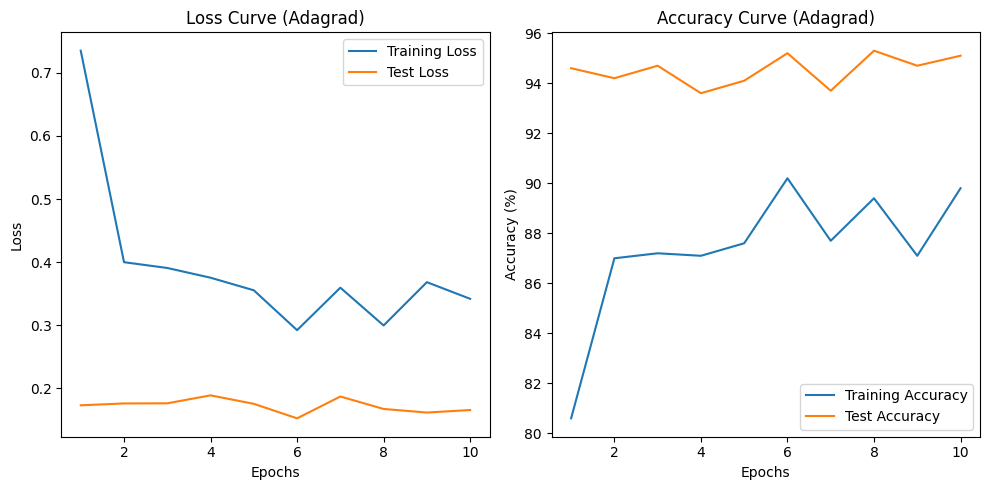

Training with Adadelta
Epoch 1/10: Train Loss: 0.5134 | Train Acc: 82.60% | Test Loss: 0.2077 | Test Acc: 92.50%
Epoch 2/10: Train Loss: 0.5163 | Train Acc: 84.20% | Test Loss: 0.3099 | Test Acc: 90.80%
Epoch 3/10: Train Loss: 0.4868 | Train Acc: 84.90% | Test Loss: 0.2974 | Test Acc: 90.90%
Epoch 4/10: Train Loss: 0.4310 | Train Acc: 86.00% | Test Loss: 0.1816 | Test Acc: 94.00%
Epoch 5/10: Train Loss: 0.5133 | Train Acc: 83.60% | Test Loss: 0.3933 | Test Acc: 88.20%
Epoch 6/10: Train Loss: 0.5036 | Train Acc: 83.70% | Test Loss: 0.2894 | Test Acc: 90.50%
Epoch 7/10: Train Loss: 0.5106 | Train Acc: 84.00% | Test Loss: 0.3018 | Test Acc: 91.10%
Epoch 8/10: Train Loss: 0.4598 | Train Acc: 84.80% | Test Loss: 0.3137 | Test Acc: 90.90%
Epoch 9/10: Train Loss: 0.5207 | Train Acc: 83.50% | Test Loss: 0.2219 | Test Acc: 93.30%
Epoch 10/10: Train Loss: 0.4672 | Train Acc: 86.40% | Test Loss: 0.1909 | Test Acc: 94.40%


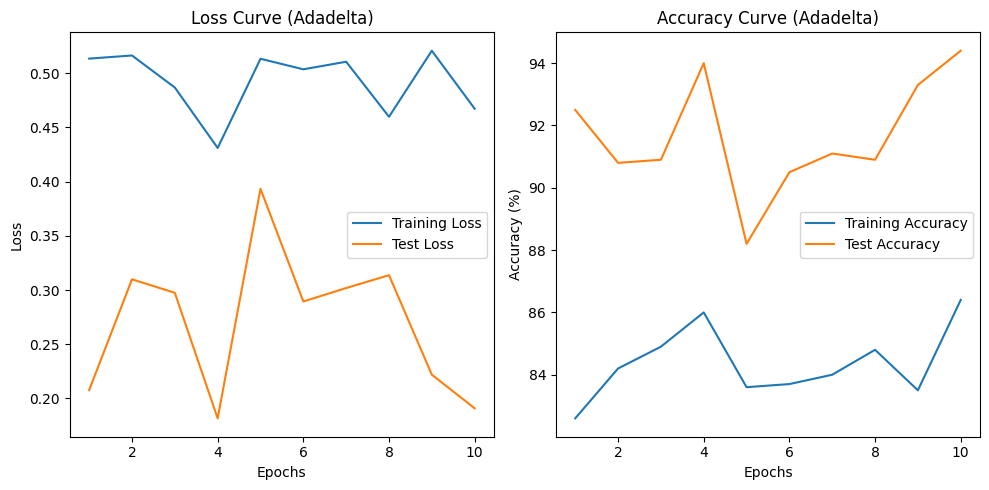

Training with RMSprop
Epoch 1/10: Train Loss: 0.6850 | Train Acc: 82.40% | Test Loss: 0.2828 | Test Acc: 91.70%
Epoch 2/10: Train Loss: 0.4030 | Train Acc: 86.90% | Test Loss: 0.1756 | Test Acc: 94.80%
Epoch 3/10: Train Loss: 0.3283 | Train Acc: 88.00% | Test Loss: 0.1828 | Test Acc: 94.10%
Epoch 4/10: Train Loss: 0.3705 | Train Acc: 87.90% | Test Loss: 0.2288 | Test Acc: 92.80%
Epoch 5/10: Train Loss: 0.3986 | Train Acc: 88.30% | Test Loss: 0.1719 | Test Acc: 94.70%
Epoch 6/10: Train Loss: 0.3692 | Train Acc: 87.80% | Test Loss: 0.1798 | Test Acc: 94.40%
Epoch 7/10: Train Loss: 0.4020 | Train Acc: 88.30% | Test Loss: 0.1513 | Test Acc: 95.40%
Epoch 8/10: Train Loss: 0.3191 | Train Acc: 90.10% | Test Loss: 0.1781 | Test Acc: 93.90%
Epoch 9/10: Train Loss: 0.3916 | Train Acc: 88.10% | Test Loss: 0.1727 | Test Acc: 94.60%
Epoch 10/10: Train Loss: 0.3905 | Train Acc: 87.50% | Test Loss: 0.1529 | Test Acc: 95.00%


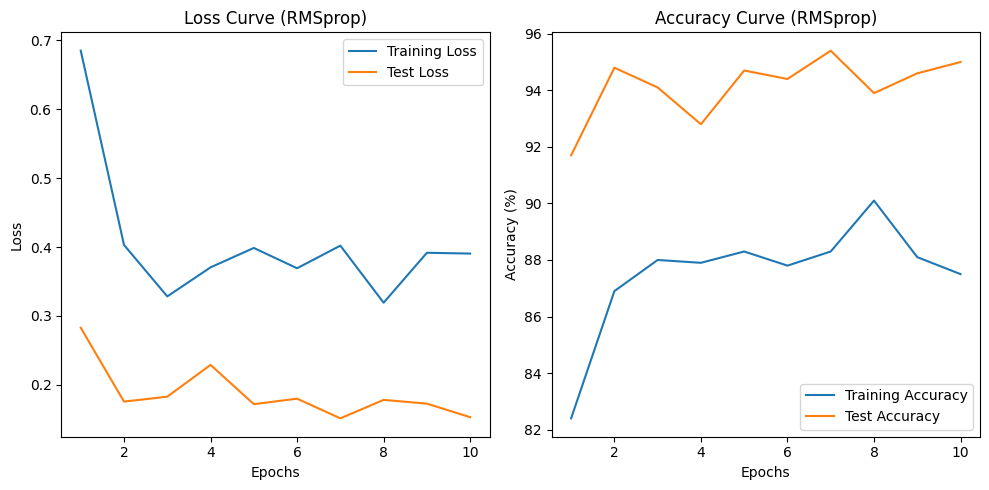

In [27]:
# Training loop for each optimizer
epochs = 10
for optimizer_name, optimizer in optimizers.items():
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    print(f"Training with {optimizer_name}")
    for epoch in range(epochs):
        train_loss, train_acc = train(optimizer)
        test_loss, test_acc = test()

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

        print(f"Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | "
              f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve ({optimizer_name})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Accuracy Curve ({optimizer_name})')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [28]:
# Report final top-5 test accuracy
model.eval()
top5_correct = 0
total = 0
with torch.no_grad():
    for inputs, targets in testloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = outputs.topk(5, 1, True, True)
        targets = targets.view(-1, 1)
        top5_correct += predicted.eq(targets).sum().item()
        total += targets.size(0)

top5_acc = 100. * top5_correct / total
print(f"Final Top-5 Test Accuracy: {top5_acc:.2f}%")

Final Top-5 Test Accuracy: 99.80%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')